<a href="https://colab.research.google.com/github/Equ4lity/DASD6003_HW2/blob/main/Assignment2_Logistic_Regression_6610422022_Thanakrit_Boonmasueb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

--2024-02-24 14:06:41--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-24 14:06:41--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-24 14:06:41--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [3]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [51]:
# Energy Absolute (EA)
data = yf.Ticker('EA')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = data.history(interval=interval,start=start,end=end)
df = df.loc[:,['Open','High','Low','Close']]
df

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,123.589996,124.699997,122.720001,123.709999
2023-01-03 10:30:00-05:00,123.690002,123.730003,122.855003,122.989998
2023-01-03 11:30:00-05:00,122.949997,123.089996,122.550003,122.925003
2023-01-03 12:30:00-05:00,122.940002,123.065002,122.400002,122.790001
2023-01-03 13:30:00-05:00,122.800003,122.919998,122.510002,122.514999
...,...,...,...,...
2023-12-29 11:30:00-05:00,136.320007,136.699997,136.320007,136.509995
2023-12-29 12:30:00-05:00,136.524994,136.770004,136.429993,136.449997
2023-12-29 13:30:00-05:00,136.455002,136.580002,136.320007,136.479996


In [52]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod=10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
df

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,125.169998,125.269997,124.690002,124.889999,124.897500,-0.414657,56.583248,0.000000,0.650002
2023-01-05 14:30:00-05:00,124.870003,125.290001,124.529999,124.639999,124.795499,-0.135972,53.116891,-0.019997,-0.299995
2023-01-05 15:30:00-05:00,124.629997,124.779999,124.389999,124.669998,124.731499,0.296005,53.496722,-0.010002,-0.240005
2023-01-06 09:30:00-05:00,125.169998,125.849998,123.010002,124.070000,124.695499,-0.030204,45.334529,0.500000,0.540001
2023-01-06 10:30:00-05:00,124.150002,124.769997,124.129997,124.550003,124.680500,-0.031248,51.862985,0.080002,-1.019997
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,136.320007,136.699997,136.320007,136.509995,136.780629,0.601263,39.481083,-0.019989,-0.639999
2023-12-29 12:30:00-05:00,136.524994,136.770004,136.429993,136.449997,136.716629,0.564705,38.183379,0.014999,0.204987
2023-12-29 13:30:00-05:00,136.455002,136.580002,136.320007,136.479996,136.668628,0.517952,39.291942,0.005005,-0.069992


In [53]:
X = df.iloc[:,:9]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,125.169998,125.269997,124.690002,124.889999,124.897500,-0.414657,56.583248,0.000000,0.650002
2023-01-05 14:30:00-05:00,124.870003,125.290001,124.529999,124.639999,124.795499,-0.135972,53.116891,-0.019997,-0.299995
2023-01-05 15:30:00-05:00,124.629997,124.779999,124.389999,124.669998,124.731499,0.296005,53.496722,-0.010002,-0.240005
2023-01-06 09:30:00-05:00,125.169998,125.849998,123.010002,124.070000,124.695499,-0.030204,45.334529,0.500000,0.540001
2023-01-06 10:30:00-05:00,124.150002,124.769997,124.129997,124.550003,124.680500,-0.031248,51.862985,0.080002,-1.019997
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,136.320007,136.699997,136.320007,136.509995,136.780629,0.601263,39.481083,-0.019989,-0.639999
2023-12-29 12:30:00-05:00,136.524994,136.770004,136.429993,136.449997,136.716629,0.564705,38.183379,0.014999,0.204987
2023-12-29 13:30:00-05:00,136.455002,136.580002,136.320007,136.479996,136.668628,0.517952,39.291942,0.005005,-0.069992


In [32]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [33]:
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.05707426142535393]
1,High,[-0.23910741663226392]
2,Low,[0.25279507648709265]
3,Close,[-0.047953907671455284]
4,S_10,[-0.020342480606090098]
5,Corr,[0.1742888257760927]
6,RSI,[-0.0035287042750277208]
7,Open-Close,[0.10546409774500495]
8,Open-Open,[-0.07197077168799636]


In [34]:
# Specify the date for prediction
prediction_date = '2023-12-1'
probability = model.predict_proba(X_test)
print(probability)

[[0.47536193 0.52463807]
 [0.45875874 0.54124126]
 [0.45585969 0.54414031]
 ...
 [0.43649583 0.56350417]
 [0.44179199 0.55820801]
 [0.46901419 0.53098581]]


In [35]:
predicted = model.predict(X_test)
predicted

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [36]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[ 75 186]
 [ 78 179]]
              precision    recall  f1-score   support

          -1       0.49      0.29      0.36       261
           1       0.49      0.70      0.58       257

    accuracy                           0.49       518
   macro avg       0.49      0.49      0.47       518
weighted avg       0.49      0.49      0.47       518



<ipython-input-56-ef5f0ca0e8ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-56-ef5f0ca0e8ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EA_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-56-ef5f0ca0e8ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

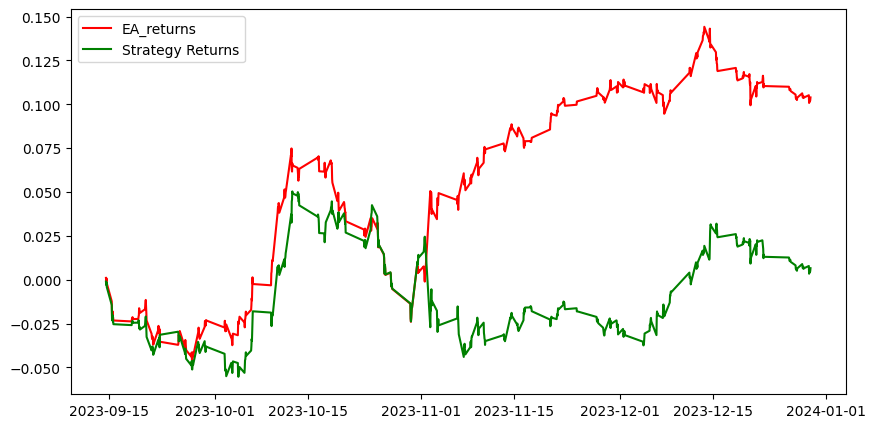

In [56]:
df['Predicted_Signal'] = model.predict(X)
df['EA_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_EA_returns = np.cumsum(df[split:]['EA_returns'])

df['Startegy_returns'] = df['EA_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_EA_returns, color='r',label = 'EA_returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [57]:
#หุ้น Next Era
data2 = yf.Ticker('NEE')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df2 = data2.history(interval=interval,start=start,end=end)
df2 = df2.loc[:,['Open','High','Low','Close']]
df2['CVX_Y'] = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)
df2

,Open,High,Low,Close,CVX_Y
Datetime,,,,,
2023-01-03 09:30:00-05:00,84.370003,84.900002,83.040001,83.150002,-1
2023-01-03 10:30:00-05:00,83.139999,84.000000,82.910004,83.080002,-1
2023-01-03 11:30:00-05:00,83.059998,83.059998,82.540001,82.830002,1
2023-01-03 12:30:00-05:00,82.845001,83.430000,82.769997,83.209999,1
2023-01-03 13:30:00-05:00,83.209999,83.565002,83.120003,83.400002,1
...,...,...,...,...,...
2023-12-29 11:30:00-05:00,60.590000,60.647499,60.279999,60.325001,-1
2023-12-29 12:30:00-05:00,60.320000,60.537601,60.303799,60.325001,1
2023-12-29 13:30:00-05:00,60.330002,60.468601,60.264999,60.400002,1


In [59]:
merged_df = pd.merge(df.iloc[:,:9],df2['CVX_Y'],on='Datetime', how='inner')
X2 = merged_df.iloc[:,:10]
y2 = np.where(merged_df['Close'].shift(-1) > merged_df['Close'],1,-1)
X2.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,CVX_Y
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,125.169998,125.269997,124.690002,124.889999,124.897500,-0.414657,56.583248,0.000000,0.650002,-1
2023-01-05 14:30:00-05:00,124.870003,125.290001,124.529999,124.639999,124.795499,-0.135972,53.116891,-0.019997,-0.299995,1
2023-01-05 15:30:00-05:00,124.629997,124.779999,124.389999,124.669998,124.731499,0.296005,53.496722,-0.010002,-0.240005,1
2023-01-06 09:30:00-05:00,125.169998,125.849998,123.010002,124.070000,124.695499,-0.030204,45.334529,0.500000,0.540001,1
2023-01-06 10:30:00-05:00,124.150002,124.769997,124.129997,124.550003,124.680500,-0.031248,51.862985,0.080002,-1.019997,-1


In [60]:
split2 = int(0.7*len(merged_df))
X_train2, X_test2, y_train2, y_test2 = X2[:split2], X2[split2:], y2[:split2], y2[split2:]

In [61]:
model2 = LogisticRegression(max_iter=1000)
model2 = model2.fit (X_train2,y_train2)
pd.DataFrame(zip(X2.columns, np.transpose(model2.coef_)))

,0,1
0,Open,[0.0885768858437618]
1,High,[-0.25956434302850295]
2,Low,[0.21517268677014817]
3,Close,[-0.031202892124316338]
4,S_10,[-0.011724920298394552]
5,Corr,[0.181435928832649]
6,RSI,[-0.003963655706062742]
7,Open-Close,[0.1731013942360885]
8,Open-Open,[-0.08000011541331008]
9,CVX_Y,[0.3037930425278744]


In [45]:
# Specify the date for prediction
prediction_date2 = '2023-12-1'
probability2 = model2.predict_proba(X_test2)
print(probability2)

[[0.40520156 0.59479844]
 [0.53683951 0.46316049]
 [0.38495853 0.61504147]
 ...
 [0.36540555 0.63459445]
 [0.37091433 0.62908567]
 [0.54941682 0.45058318]]


In [62]:
predicted2 = model2.predict(X_test2)
print(metrics.confusion_matrix(y_test2, predicted2))
print(metrics.classification_report(y_test2, predicted2))

[[148 113]
 [103 154]]
              precision    recall  f1-score   support

          -1       0.59      0.57      0.58       261
           1       0.58      0.60      0.59       257

    accuracy                           0.58       518
   macro avg       0.58      0.58      0.58       518
weighted avg       0.58      0.58      0.58       518



In [63]:
print('Model Accuracy')
print(f'Model_1 {round(model.score(X_test,y_test)*100,2)} %')
print(f'Model_2 {round(model2.score(X_test2,y_test2)*100,2)} %')

Model Accuracy
Model_1 49.03 %
Model_2 58.3 %


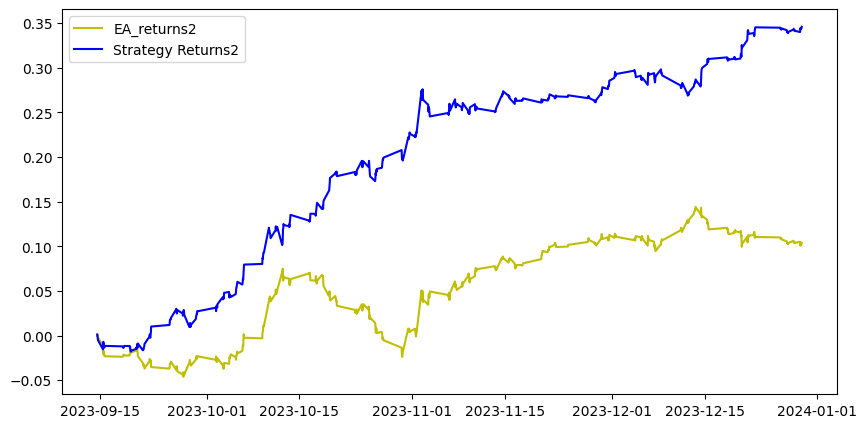

In [64]:
merged_df['Predicted_Signal'] = model2.predict(X2)
merged_df['EA_returns'] = np.log(merged_df['Close']/merged_df['Close'].shift(1))
Cumulative_EA_CVX_returns2 = np.cumsum(merged_df[split:]['EA_returns'])

merged_df['Startegy_returns'] = merged_df['EA_returns']* merged_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_CVX_returns2 = np.cumsum(merged_df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_EA_CVX_returns2, color='y',label = 'EA_returns2')
plt.plot(Cumulative_Strategy_CVX_returns2, color='b', label = 'Strategy Returns2')
plt.legend()
plt.show()

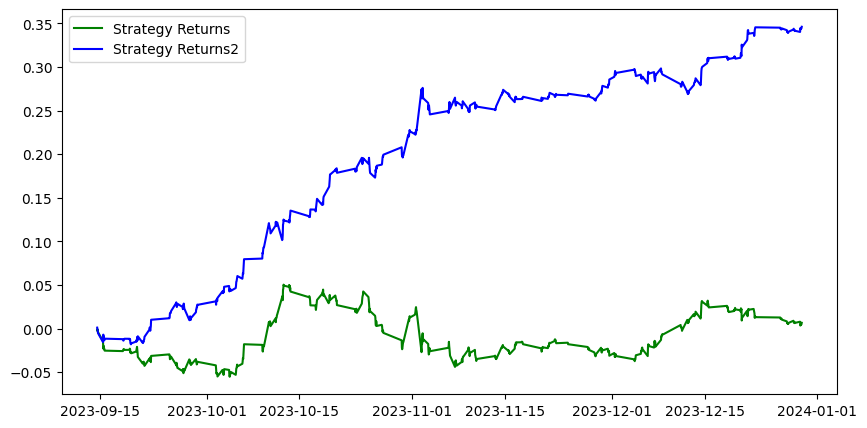

In [65]:
#เปรียบเทียบ Strategy Returns ของ model1, model2
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_Strategy_CVX_returns2, color='b', label = 'Strategy Returns2')
plt.legend()
plt.show()